<h1><center>Data science for Geographers</center></h1>

<h2><center>Practical 3 - Regression - assumptions and diagnostics in R</center></h2>

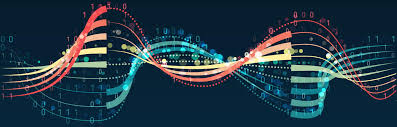

## Contents<a class="anchor" id="contents"></a>

- 1. [Introduction](#section1)
    - [Load required packages](#section1.1)
    - [Load merged_data.csv](#section1.2)
    - [Run simple linear regression from last practical](#section1.3)
- 2. [Model Assumptions](#section2)
- 3. [What would we expect to see?](#section3)
    - [Linear relationship](#section3.1)
    - [Non-linear relationship](#section3.2)


## 1. Introduction<a class="anchor" id="section1"></a>

In the last practical we looked at a simple linear regression, i.e. regression with one dependent and one independent variable. At the start of this practical, we will look at the outcome of that regression, go over the assumptions of the model, and run some model diagnostics.

### Load required packages<a class="anchor" id="section1.1"></a>

First, let's load the packages that we will need.

In [1]:
library(tidyverse)

Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tibble’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Load merged_data.csv<a class="anchor" id="section1.2"></a>

In [3]:
analysis_data <- read_csv("analysis_data.csv")

Rows: 6947 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): datazone, simd_decile, simd_quintile, urban_rural, income_quintile...
dbl (14): retailer_count, total_population, simd_rank, income_rank, health_r...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Run simple linear regression from last practical<a class="anchor" id="section1.3"></a>

Is the number of tobacco retailers associated with smoking rates in datazones in Scotland?Is the number of tobacco retailers associated with smoking rates in datazones in Scotland?

In [6]:
#Create a new analysis object
urban_only <- analysis_data %>%
    filter(urban_rural_2cat == "Urban")

#Run a linear regression model
simple_linear_regression <- 
    lm(smoking_rate ~ retailers_adj, 
       data = urban_only, 
       na.action = na.exclude)

summary(simple_linear_regression)

confint(simple_linear_regression)


Call:
lm(formula = smoking_rate ~ retailers_adj, data = urban_only, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.787 -10.675  -2.396   8.191  59.312 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.19126    0.43367  30.418   <2e-16 ***
retailers_adj  0.03730    0.01556   2.397   0.0166 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.75 on 5726 degrees of freedom
Multiple R-squared:  0.001002,	Adjusted R-squared:  0.0008278 
F-statistic: 5.745 on 1 and 5726 DF,  p-value: 0.01657


,2.5 %,97.5 %
(Intercept),12.341096896,14.0414244
retailers_adj,0.006793196,0.0678138


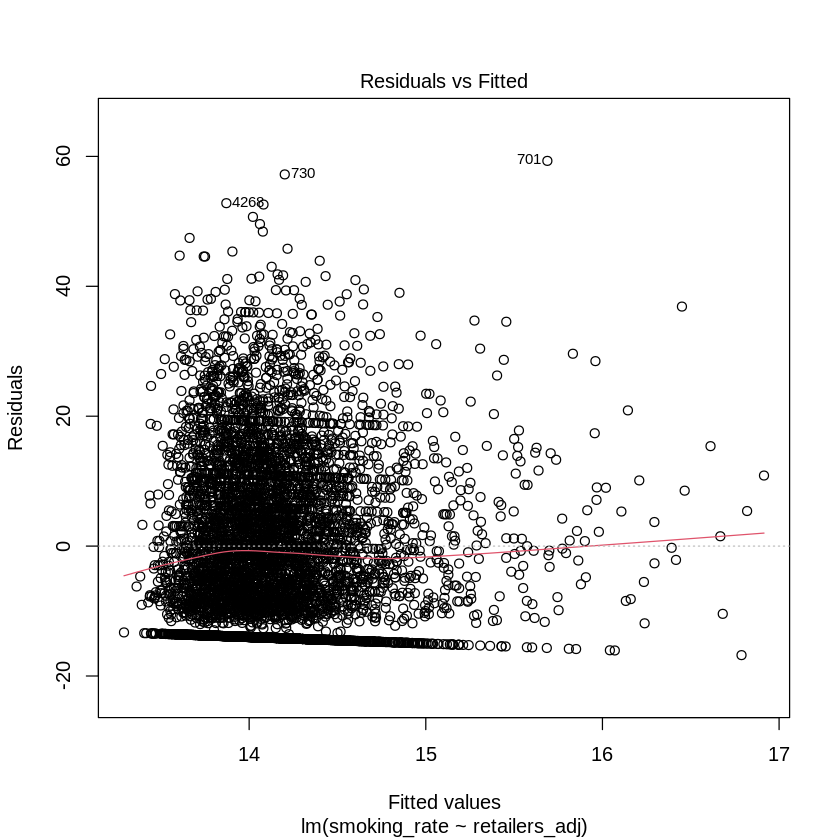

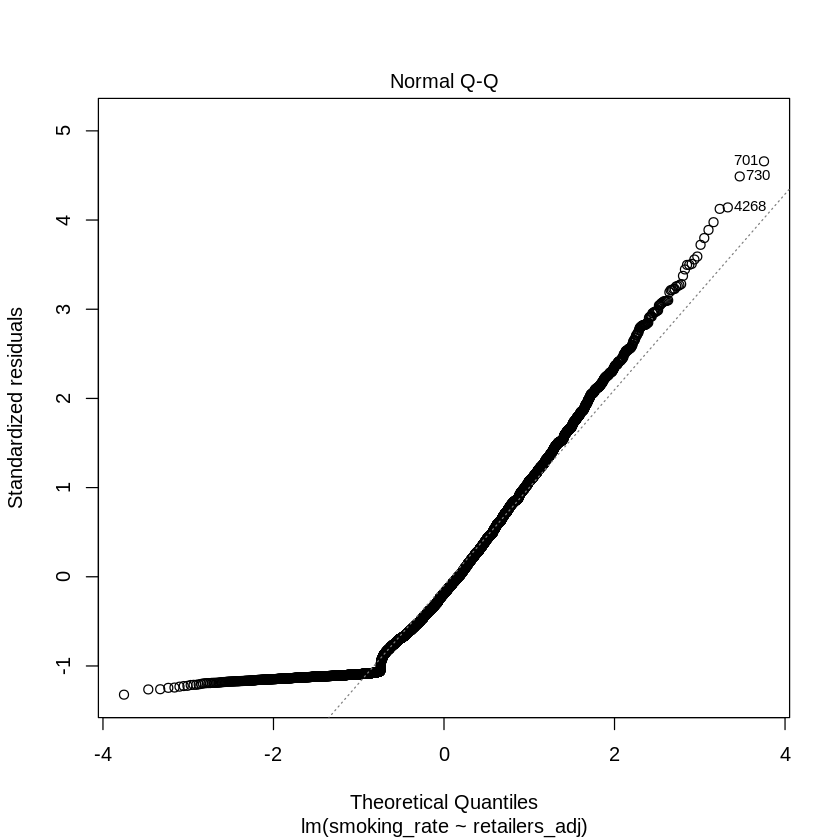

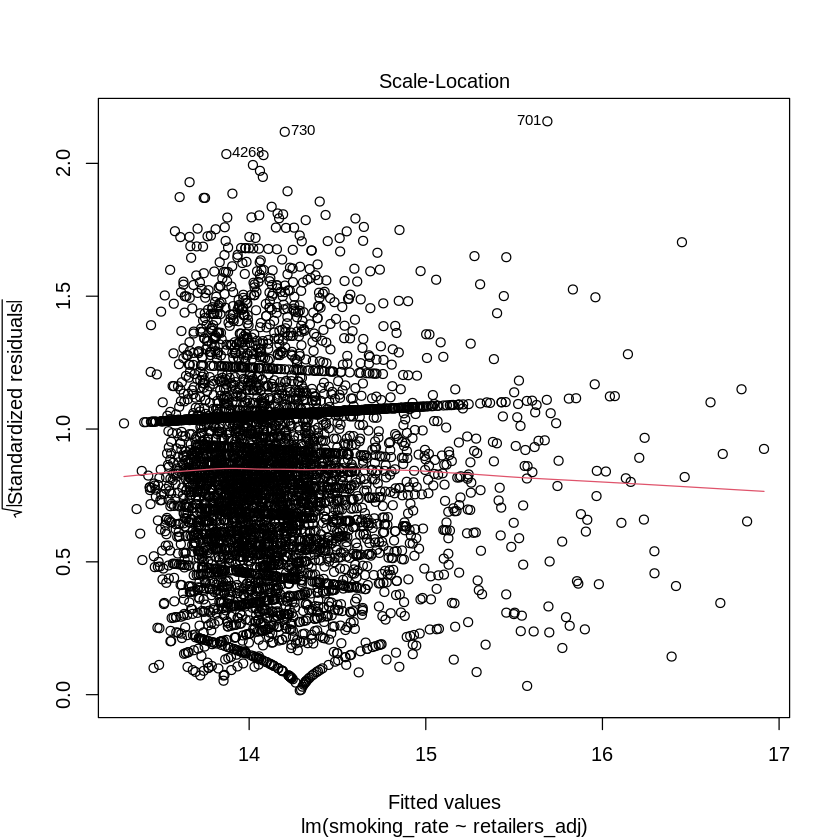

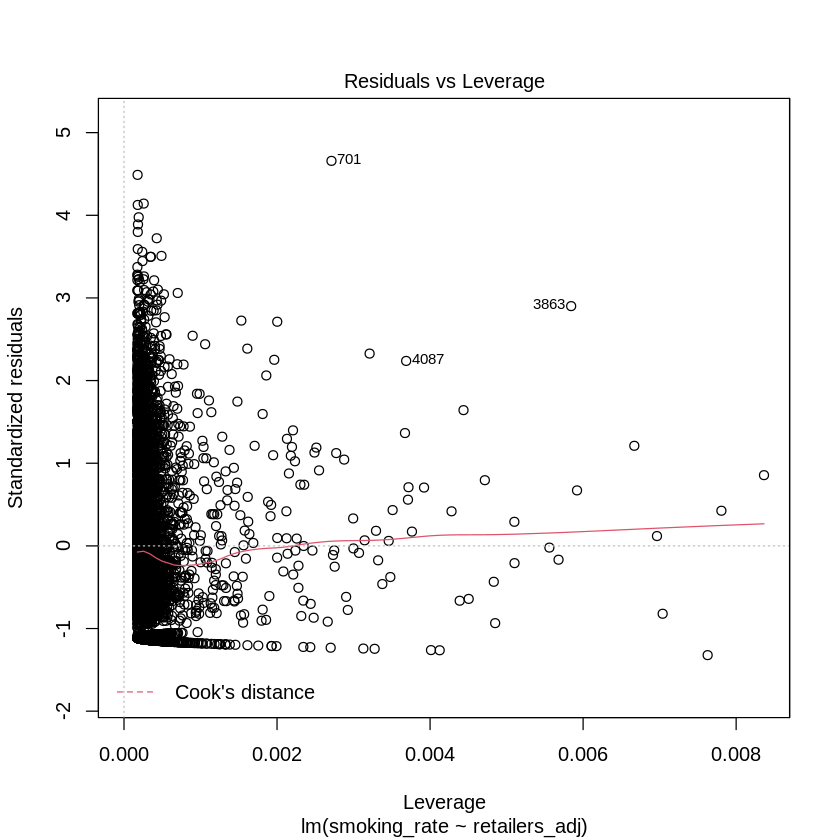

In [7]:
plot(simple_linear_regression)

`geom_smooth()` using formula 'y ~ x'



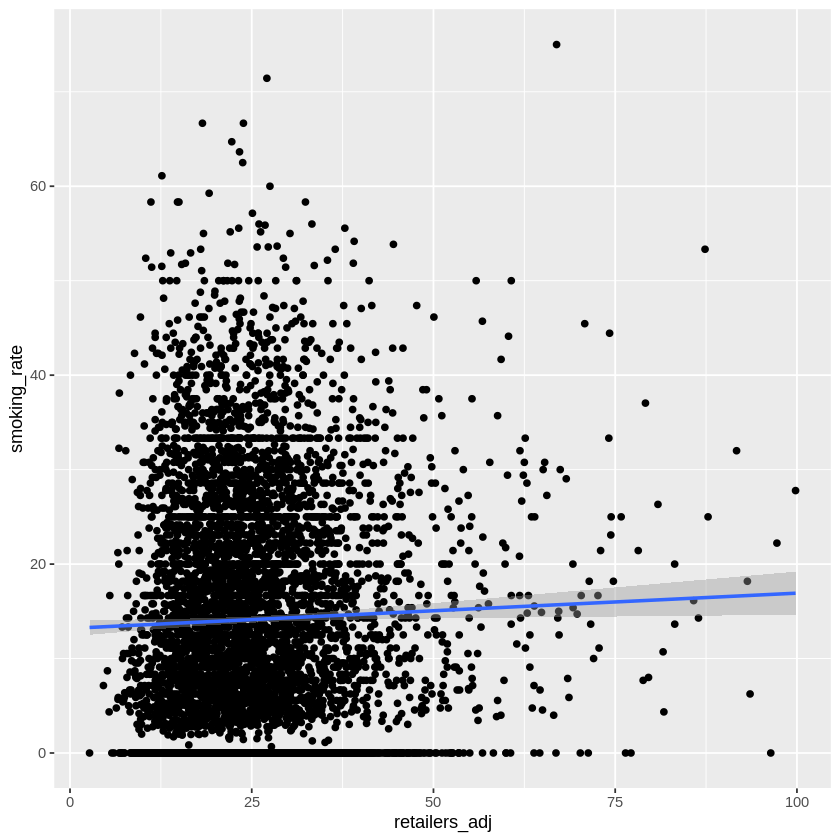

In [11]:
ggplot(urban_only, aes(x = retailers_adj, y = smoking_rate)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, level = 0.95)

## 2. Model Assumptions

- Linear relationship between outcome and exposure variable
- Constant variance of errors (homoscedasticity)
- Independence of errors
- Normality of errors

## 3. What would we expect to see?<a class="anchor" id="section3"></a>

### Linear relationship<a class="anchor" id="section3.1"></a>

Here, we simulate data that meets the assumptions of linear regression to see what we would expect our residual plots to look like.

`geom_smooth()` using formula 'y ~ x'



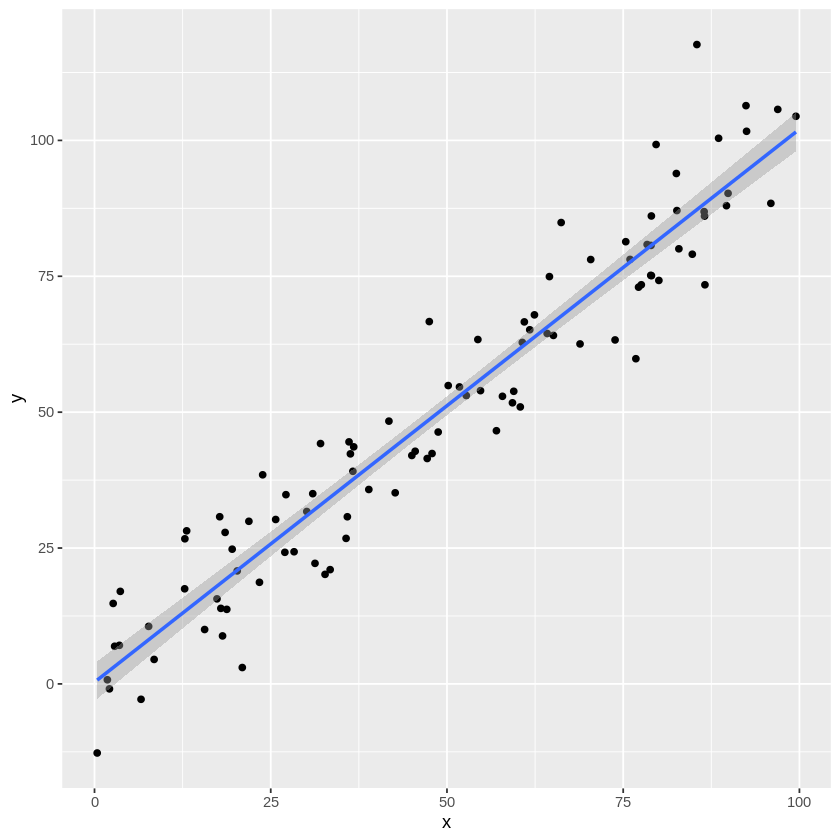

In [14]:
# Create x and y values that have a positive linear relationship
x <- runif(100, 0, 100) #generate 100 random numbers between 0 and 100
y <- x + rnorm(100, 0, 10) # generate some y values that are linearly correlated with x

my_data <- data.frame(x, y)

ggplot(my_data, aes(x = x, y = y)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, level = 0.95)

In [15]:
model1 <- lm(y ~ x, data = my_data)

summary(model1)

confint(model1)


Call:
lm(formula = y ~ x, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.631  -5.897  -1.039   5.442  30.377 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.30996    1.74627   0.177    0.859    
x            1.01745    0.03089  32.936   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.757 on 98 degrees of freedom
Multiple R-squared:  0.9171,	Adjusted R-squared:  0.9163 
F-statistic:  1085 on 1 and 98 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-3.1554488,3.775371
x,0.9561507,1.078757


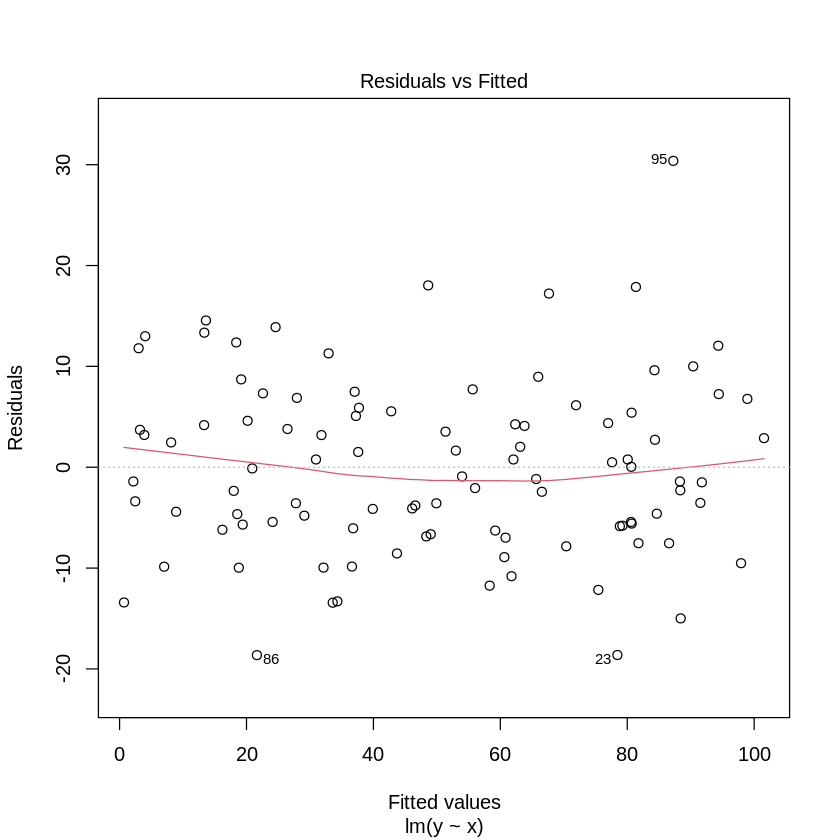

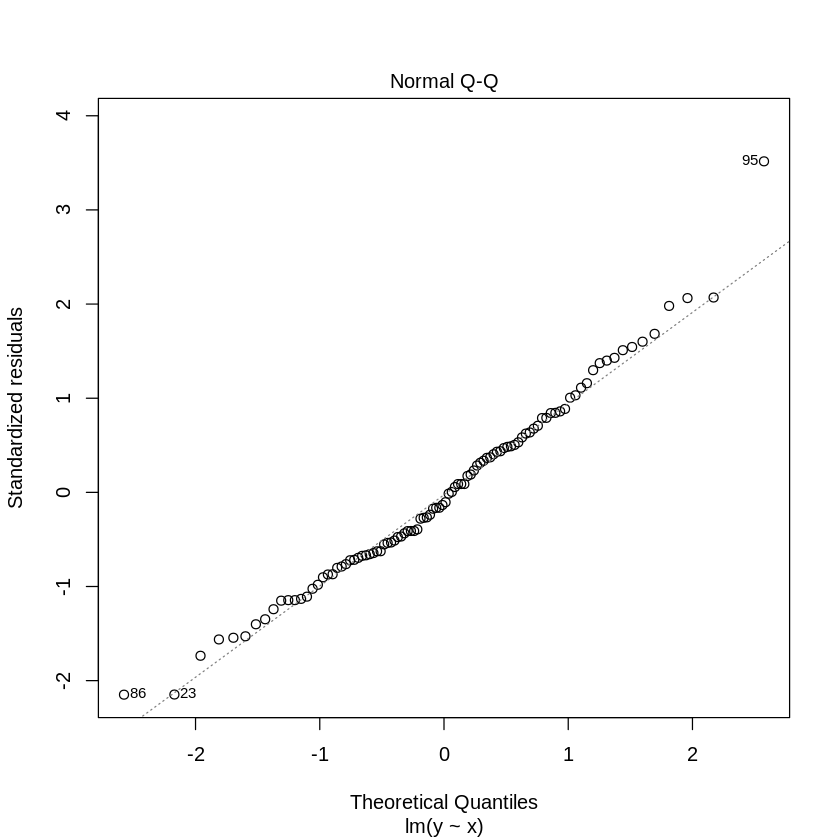

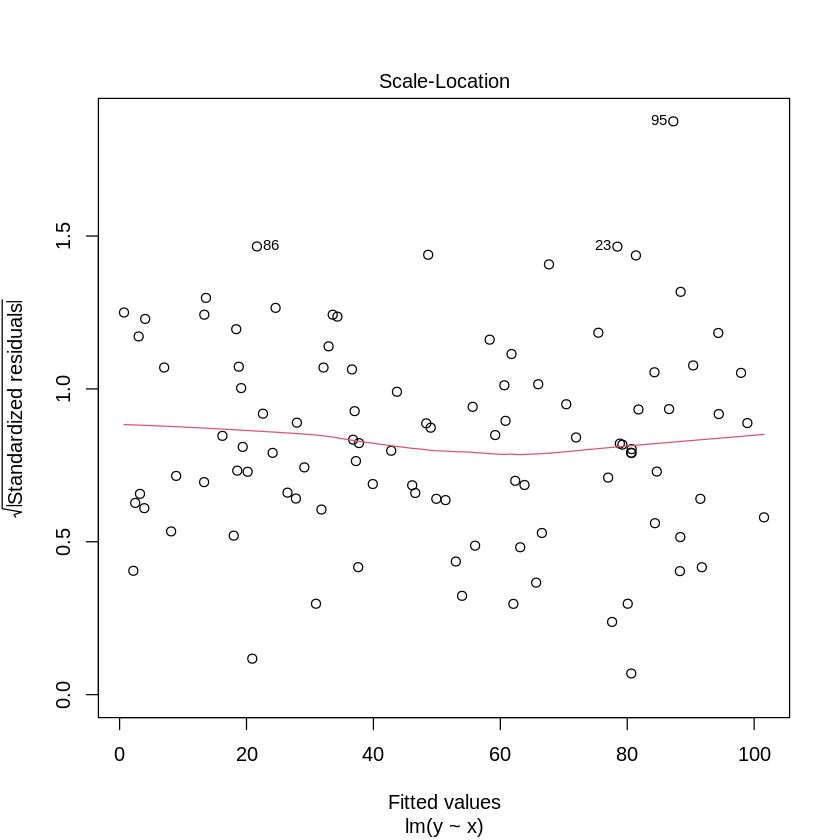

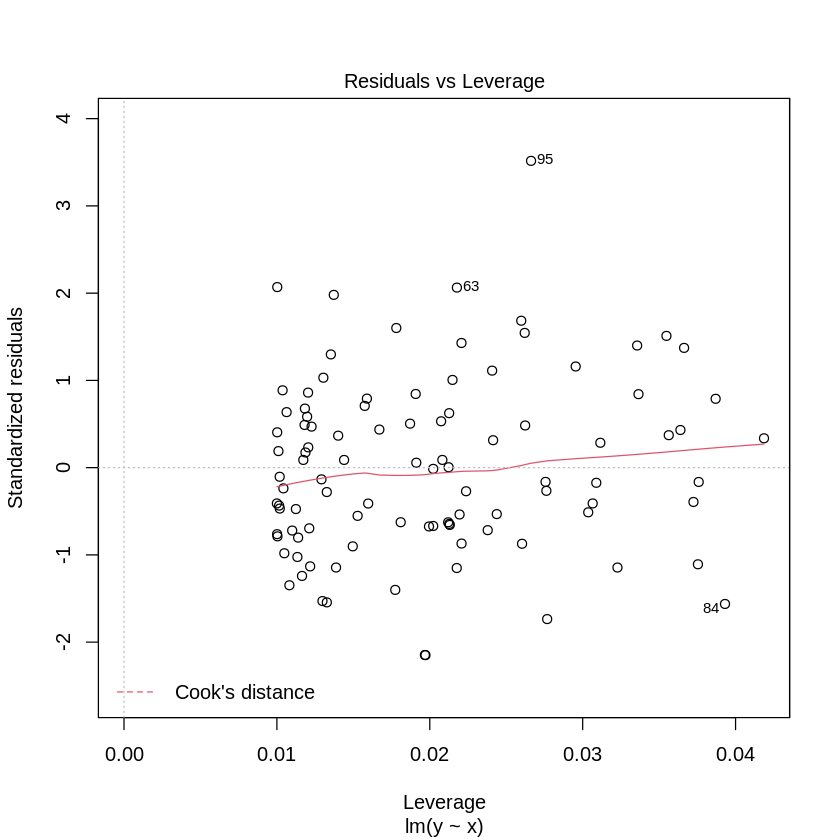

In [16]:
plot(model1)

### Non-linear relationship<a class="anchor" id="section3.2"></a>

`geom_smooth()` using formula 'y ~ x'



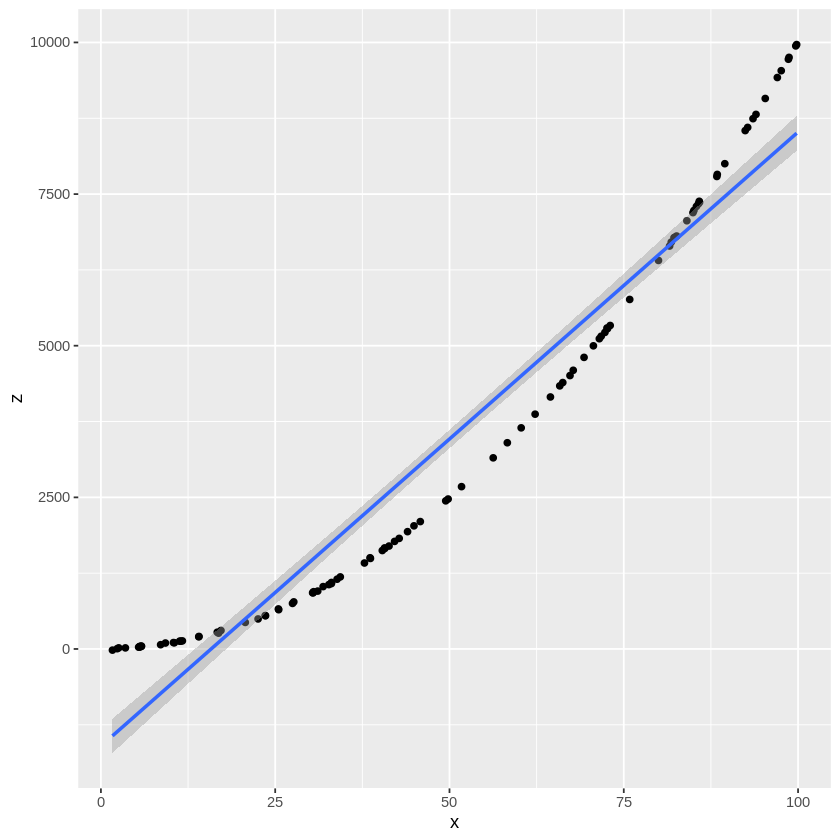

In [7]:
# Create x and y values that have a non-linear relationship
x <- runif(100, 0, 100) #generate 100 random numbers between 0 and 100
z <- x^2 + rnorm(100, 0, 10) # generate some z values that are non-linearly related to x

my_data2 <- data.frame(x, z)

ggplot(my_data2, aes(x = x, y = z)) +
    geom_point() +
    geom_smooth(method = "lm", se = TRUE, level = 0.95)

We have simulated a non-linear relatonship between x and z, therefore, a linear model is inappropriate in this case. But what happens if we fit a linear model?

In [5]:
model2 <- lm(z ~ x, data = my_data2)

summary(model2)

confint(model2)


Call:
lm(formula = z ~ x, data = my_data2)

Residuals:
   Min     1Q Median     3Q    Max 
-896.9 -604.9 -261.3  413.9 1624.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1870.178    145.286  -12.87   <2e-16 ***
x             102.406      2.545   40.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 704.2 on 98 degrees of freedom
Multiple R-squared:  0.9429,	Adjusted R-squared:  0.9423 
F-statistic:  1619 on 1 and 98 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-2158.49345,-1581.8625
x,97.35536,107.4568


From this model summary, we can't see anything wrong - the confidence interval does not contain 0 and the adjusted R^2 is high. But this is misleading as we know that a linear model is not the correct choice. The model summary does not check the underlying assumptions of the model - so let's see what the diagnostic plots show:

Reminder: R^2 is a measure of the degree of fit. It is the fraction of the total variation in the outcome variable that is explained by the regression model. R^2 varies between 0 and 1; 0 explains none of the variation and 1 explains all of the variation.

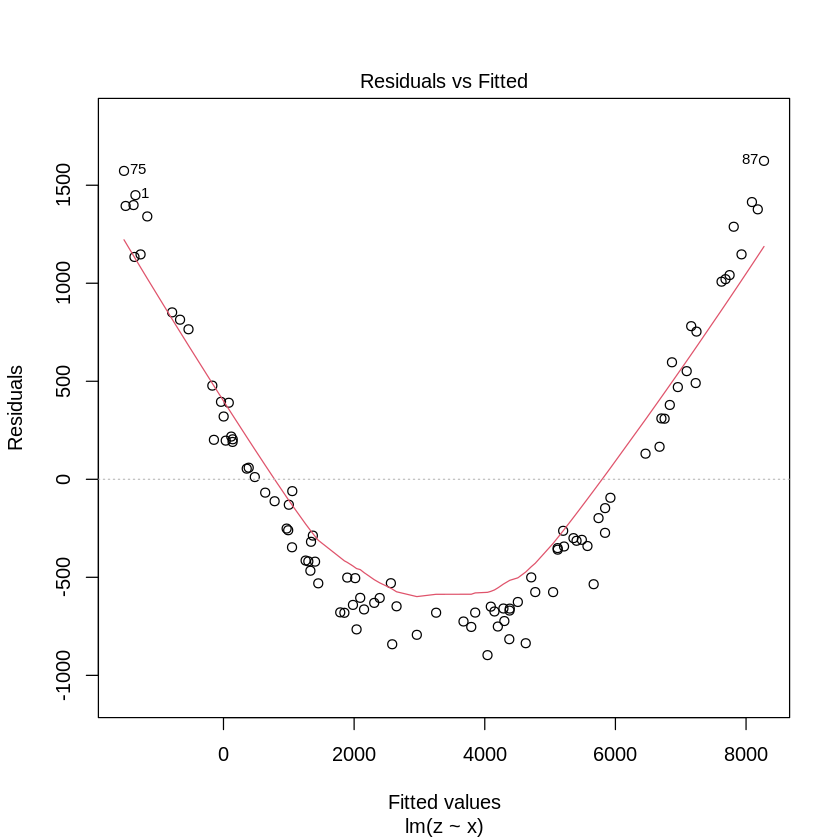

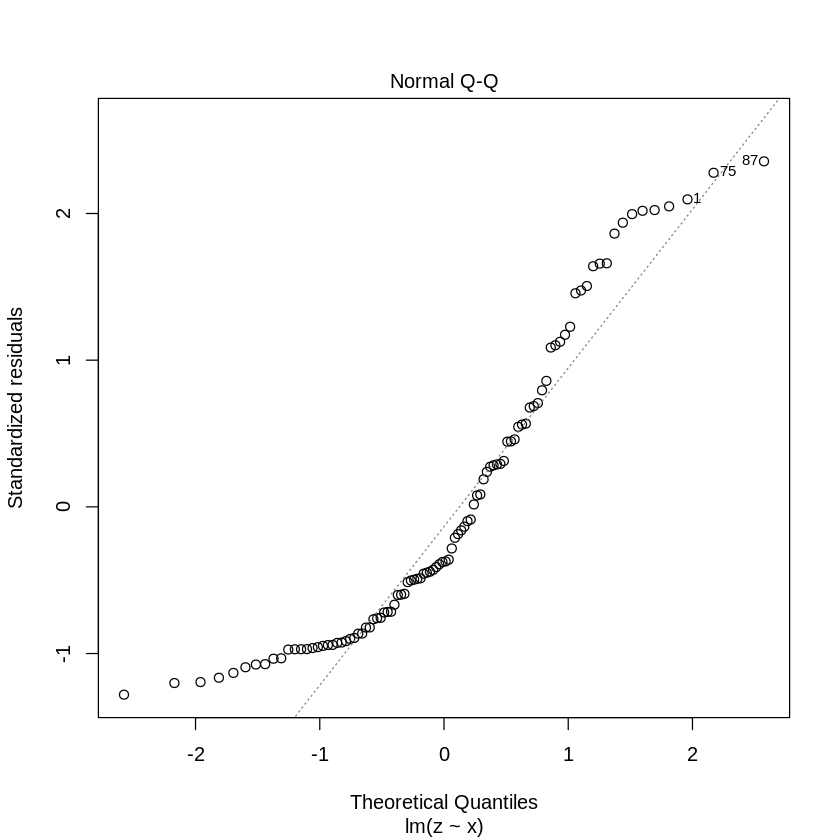

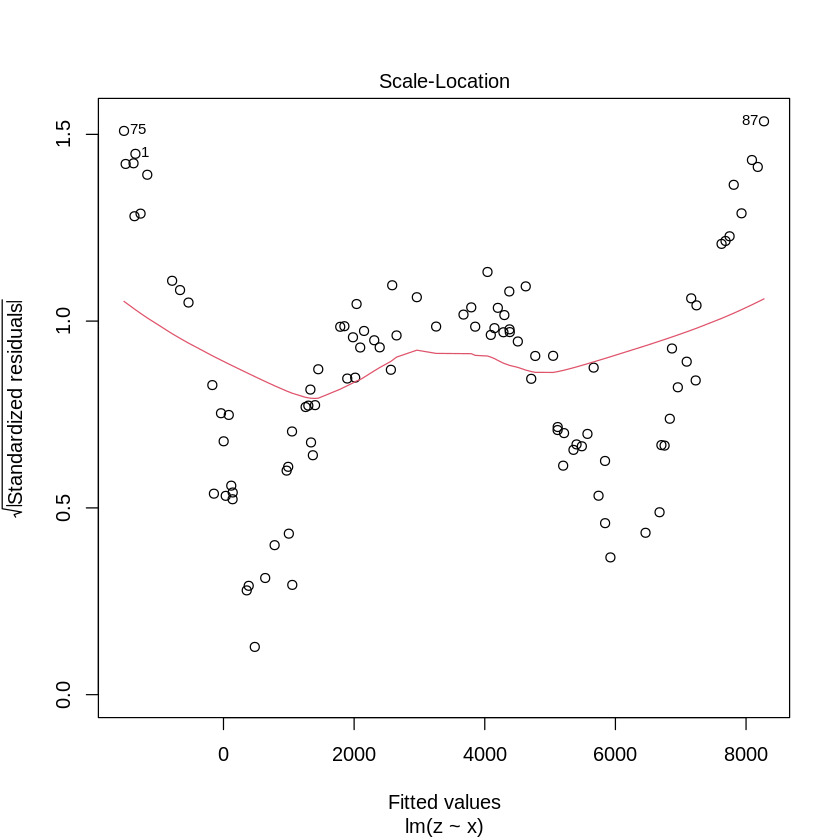

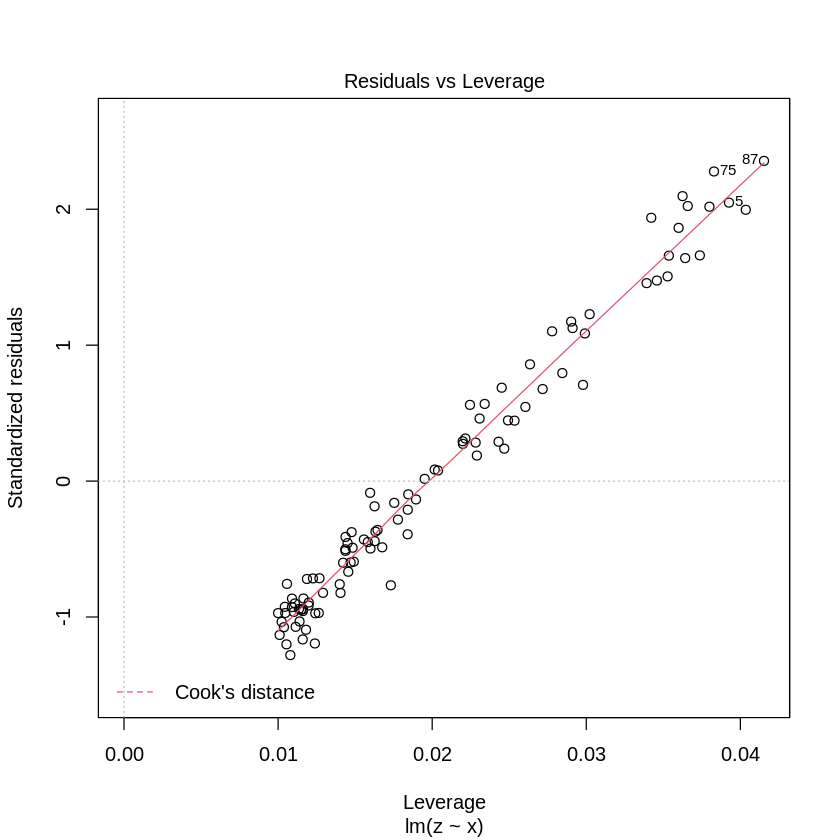

In [8]:
plot(model2)